In [73]:
#preprocessing SANBS data

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [71]:
# load merged dataset (donation_donor, deferrals, collec_sites)

df=pd.read_csv("../1_data/private/VitalantData.csv")
print(df.columns)
pd.set_option('display.max_columns', 48)
len(df)
df.head()




/tmp/ipykernel_1196131/2585038156.py:3: DtypeWarning: Columns (27,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../1_data/private/VitalantData.csv")


Index(['DON_DATE_KEY', 'DONOR_KEY', 'DONOR_NUMBER', 'DONATION_NUMBER',
       'ACTIVE_DONOR_TYPE', 'SITE_KEY', 'COLLECTION_SITE_KEY',
       'DONATION_VOLUME_DRAWN', 'DRIVE_ID', 'PHLEB_START_TIME_KEY',
       'PHLEB_STOP_TIME_KEY', 'PHLEBOTOMY_CODE', 'PHLEBOTOMY_DESC',
       'PHLEBOTOMY_STATUS', 'DONATION_PROCEDURE_TYPE', 'PHLEBOTOMY_GROUP',
       'DONATION_TYPE', 'DONATION_BAG_DESCRIPTION', 'DONOR_GENDER',
       'DONOR_ABORH', 'DONOR_ETHNICITY_DESC', 'RACE_ETHNICITY',
       'RACE_DESCRIPTION', 'DONOR_COUNTRY_OF_BIRTH', 'DONOR_EDUCATION_DESC',
       'DONOR_WEIGHT', 'DONOR_HEIGHT', 'DONOR_ZIPCODE',
       'DONOR_AGE_AT_DONATION', 'COLLECTION_FIXED_LOCATION',
       'COLLECTION_SITE_VALID_FLAG', 'BECS_ID', 'DRIVE_SETUP_TYPE',
       'DRIVE_TYPE_FIXED_MOBILE', 'DEFERRAL_EVENT', 'DEFERRAL_INFORMATION',
       'DEFERRAL_CREATE_DATE', 'DEFERRAL_START_DATE', 'DEFERRAL_STOP_DATE',
       'DEF_INVALDATION_DATE', 'DEFERRAL', 'DEFERRAL_DESCRIPTION',
       'DEFERRAL_VALID_CODE', 'DEFERRAL_DU

,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,...,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP,MQ_ANSWER_x,MQ_ANSWER_y,MQ_ANSWER_x.1,MQ_ANSWER_y.1,SITE_STATE,ACCOUNT_TYPE_NAME,SITE_ZIPCode,Visit_Date,DonorID,cum_lifetime_donations,unit_rbc_loss,time_to_fu,rbc_loss_last_12_months,rbc_loss_last_24_months,days_since_last_rbc_loss,days_since_last_drbc_loss
0,20130625.0,15057895.0,82X912T,W28861300166600F,Active,3003.0,62130.0,NaN,NaN,18:58:01,19:10:01,W,WHOLE BLOOD,Successful Phlebotomy,Other,Whole Blood,Allogeneic,Historical Triple Bag,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-25T00:00:00Z,15057895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140525.0,840652.0,5006735,W04221402205100P,First Time,51.0,383.0,500.0,612.0,17:04:01,17:14:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.8,NaN,15.8,NaN,NaN,NaN,NaN,2014-05-25T00:00:00Z,840652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20141018.0,792640.0,2109508,W04221404264200Q,Active,51.0,376.0,452.0,600.0,10:24:01,12:14:01,A,APHERESIS (PLT/GRAN),Successful Phlebotomy,Automated,Platelet,Allogeneic,TRIMA APHERESIS PLATELETS,M,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.6,NaN,16.6,NaN,PA,Healthcare,152.0,2014-10-18T00:00:00Z,792640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140726.0,7079135.0,5024441,W04221402021200I,First Time,51.0,380.0,500.0,602.0,12:28:01,12:49:01,U,UNSUCCESSFUL DRAW,Unsuccessful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.3,NaN,16.3,NaN,NaN,NaN,NaN,2014-07-26T00:00:00Z,7079135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20140519.0,6126680.0,4186033,W042214021267009,Active,51.0,383.0,440.0,612.0,11:31:01,12:05:01,R,2RBC - ALLOGENEIC,Successful Phlebotomy,Automated,2RBC,Allogeneic,HAEMONETICS APHERESIS 2RBC FILTERED,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.1,NaN,16.1,NaN,NaN,NaN,NaN,2014-05-19T00:00:00Z,6126680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#drop unknown donor number or donor key 0
df.drop(df[(df['DONOR_NUMBER'] == 'UNKNOWN')].index, inplace=True)
df.drop(df[(df['DONOR_KEY'] == 0.0)].index, inplace=True)

df.DONATION_TYPE.value_counts()

Allogeneic     15723306
Therapeutic      157549
Directed          16781
Name: DONATION_TYPE, dtype: int64

In [76]:
#add a column OUTCOME_TYPE that indicates hgb deferal, other deferral or completed donation to indicate deferral type

#list of variables present only in deferral dataset
def_columns=['DEFERRAL_EVENT', 'DEFERRAL_INFORMATION',
       'DEFERRAL_CREATE_DATE', 'DEFERRAL_START_DATE', 'DEFERRAL_STOP_DATE',
       'DEF_INVALDATION_DATE', 'DEFERRAL', 'DEFERRAL_DESCRIPTION',
       'DEFERRAL_VALID_CODE', 'DEFERRAL_DURATION', 'DURATION_MODIF_TYPE',
       'ALLOW_DISTRIBUTION', 'DEFERRAL_GROUP']

df['def_isna']=df[def_columns].isnull().apply(lambda x: all(x), axis=1) 


# if all def columns are null - then the donation was succesful 
df['OUTCOME_TYPE'] = np.where(df['def_isna'] == True, 'completed', None)

df['HGB_value']=np.where((df.MQ_ANSWER_y.notna()),df.MQ_ANSWER_y, df.MQ_ANSWER_x)# if hgb recheck avaible use that as hgb val else use hgb val

#convert MQ_answer to float
df['HGB_value']=pd.to_numeric(df['HGB_value'], errors='coerce')

#replace all nan hgb values with 999
df['HGB_value'].replace(np.nan, 999, regex=True, inplace=True)


#using hgb values: 12.5 for women and 13.0 for men
df.loc[(df['HGB_value']<=13.0) & (df['DONOR_GENDER'] == "M"), 'OUTCOME_TYPE'] = 'low hgb'
df.loc[(df['HGB_value']<=12.5) & (df['DONOR_GENDER'] == "F"), 'OUTCOME_TYPE'] = 'low hgb'

#fill in all other outcomes types as other
df['OUTCOME_TYPE'].fillna("other deferral", inplace=True)

df.drop(df[df['DON_DATE_KEY'].isna()].index, inplace=True) #remove any missing visit dates

df["Visit_Date"] = pd.to_datetime(df['DON_DATE_KEY'], format='%Y%m%d') #convert to datetime object

df.sort_values(by=['DONOR_KEY', 'DONOR_NUMBER', 'Visit_Date'], axis = 0, inplace=True)

#add first time
df['first_time']=np.where(df.ACTIVE_DONOR_TYPE=='First Time', 1,0)

df['OUTCOME_TYPE'].value_counts()



completed         15374159
other deferral      263571
low hgb             259906
Name: OUTCOME_TYPE, dtype: int64

In [86]:
#compute deferral rates

first=df.query("first_time == 1")
repeat=df.query("first_time == 0")
    
table={}
table['-']=['Female', 'Male', 'All']
   
    #first time
female=(len(first.loc[(first.DONOR_GENDER == 'F') & (first.OUTCOME_TYPE=='low hgb')])/len(first.loc[(first.DONOR_GENDER == 'F')]))
male=(len(first.loc[(first.DONOR_GENDER == 'M') & (first.OUTCOME_TYPE=='low hgb')])/len(first.loc[(first.DONOR_GENDER == 'M')]))
alls=(len(first.loc[(first.OUTCOME_TYPE=='low hgb')])/len(first))
table['First Time']=[female, male, alls]
    
    #repeat
    
female=(len(repeat.loc[(repeat.DONOR_GENDER == 'F') & (repeat.OUTCOME_TYPE=='low hgb')])/len(repeat.loc[(repeat.DONOR_GENDER == 'F')]))
male=(len(repeat.loc[(repeat.DONOR_GENDER == 'M') & (repeat.OUTCOME_TYPE=='low hgb')])/len(repeat.loc[(repeat.DONOR_GENDER == 'M')]))
alls=(len(repeat.loc[(repeat.OUTCOME_TYPE=='low hgb')])/len(repeat))
table['Repeat']=[female, male, alls]
    
    #all 
    
female=(len(df.loc[(df.DONOR_GENDER == 'F') & (df.OUTCOME_TYPE=='low hgb')])/len(df.loc[(df.DONOR_GENDER == 'F')]))
male=(len(df.loc[(df.DONOR_GENDER == 'M') & (df.OUTCOME_TYPE=='low hgb')])/len(df.loc[(df.DONOR_GENDER == 'M')]))
alls=(len(df.loc[(df.OUTCOME_TYPE=='low hgb')])/len(df))
table['All']=[female, male, alls]


In [87]:
table=pd.DataFrame.from_dict(table)
print(table)

        -  First Time    Repeat       All
0  Female    0.016308  0.019584  0.018988
1    Male    0.005792  0.010458  0.009675
2     All    0.011545  0.015230  0.014584


In [88]:
######## generate some cross tables
#df['DEFERRAL_GROUP'].fillna(value='missing', inplace=True)
#df.head(25)
#pd.set_option('display.max_rows', 1500)
#pd.crosstab(index=df['DONATION_BAG_DESCRIPTION'], columns=df['DEFERRAL_GROUP'], dropna=False)
#df.columns


In [105]:
#add censored column (indicates whether row is right censored) 0-censored, 1-notcensored
df['CENSORED']=np.where(df['DONOR_KEY'] == df['DONOR_KEY'].shift(-1), 1, 0)

#add time_to_return column (time between visits)
#if return exists -> difference between visit dates
#else difference between visit date and end of data collection 2022-12-31
df["Visit_Date"] = pd.to_datetime(df['DON_DATE_KEY'], format='%Y%m%d') #convert to datetime object
df['time_to_return']= np.where(df['CENSORED']==1, (df['Visit_Date'].shift(-1)-df['Visit_Date'])/np.timedelta64(1, 'D'), (dt.datetime(2022, 12, 31)-df["Visit_Date"])/np.timedelta64(1, 'D'))
#df['time_to_return'].fillna((df['VISIT_DATE'].shift(-1)-df["VISIT_DATE"])/np.timedelta64(1, 'D'), inplace=True)



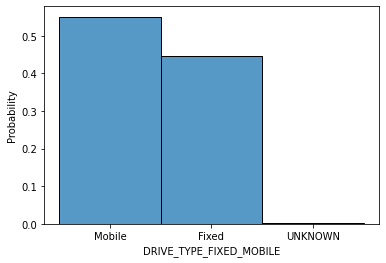

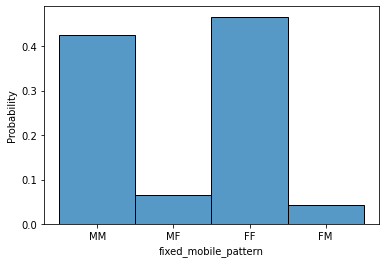

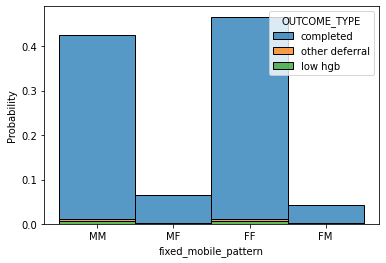

0.014625058151601457
0.014550916716315938
5386782
6656694


In [90]:
#Fixed-Mobile Donations Analysis

#plot number - mobile=0, fixed=1

sns.histplot(df, x="DRIVE_TYPE_FIXED_MOBILE", stat="probability")


df['Fixed_mobile'] = np.where(df["DRIVE_TYPE_FIXED_MOBILE"] == 'Fixed', 1, 0) #mobile is 0, fixed is 1
#sns.histplot(df, x="Fixed_mobile", stat="probability")

#create a column to indicate 
    #1. mobile then mobile - mm
    #2. mobile then fixed -mf
    #3. fixed then fixed - ff
    #4. fixed then mobile - fm

df["FIXED_NEXT"] = np.where((df['DONOR_KEY'] == df['DONOR_KEY'].shift(-1)), df['Fixed_mobile'].shift(-1), 10)
df.loc[((df['FIXED_NEXT']== 1) & (df['Fixed_mobile']== 1)), 'fixed_mobile_pattern'] = 'FF'

df.loc[((df['FIXED_NEXT']==0) & (df['Fixed_mobile']== 0)), 'fixed_mobile_pattern']= 'MM'

df.loc[((df['FIXED_NEXT']==0) & (df['Fixed_mobile']== 1)), 'fixed_mobile_pattern'] = 'FM'

df.loc[((df['FIXED_NEXT']==1) & (df['Fixed_mobile']== 0)), 'fixed_mobile_pattern']= 'MF'
df['fixed_mobile_pattern'].fillna('last', inplace=True)

df2 = df[df['fixed_mobile_pattern'] != 'last']

#Plot fixed pattern
#create value count
plt.figure()
sns.histplot(df2, x="fixed_mobile_pattern", stat="probability")
#sns.countplot(fixed_mobile)

# the % of each fixed mobile pattern resulting in hemoglobin deferral or other deferral
plt.figure()
i=sns.histplot(data=df2, x="fixed_mobile_pattern", hue="OUTCOME_TYPE", stat = 'probability',binwidth=1, multiple="stack")
#plt.legend(title='Fixed vs Mobile by Year', loc='upper left', labels=['Mobile', 'Fixed'])
plt.show(i)

# percent population fixed vs mobile by year
#plt.figure()
#sns.histplot(data=df, x="Visit_yr", hue="Fixed_mobile", binwidth=1)

# the % of each resulting in hemoglobin deferral or other deferral

print(len(df.loc[((df['OUTCOME_TYPE']=="low hgb") & (df['Fixed_mobile']== 1))])/len(df.loc[(df['Fixed_mobile']==1)]))
print(len(df.loc[((df['OUTCOME_TYPE']=="low hgb") & (df['Fixed_mobile']== 0))])/len(df.loc[(df['Fixed_mobile']==0)]))

print(len(df.loc[(df['Fixed_mobile']==1)]))
print(len(df.loc[(df['Fixed_mobile']==0)]))



In [91]:
#look at mobile ID to see the number of times a year it is visited 
#filter unique dates - some go for 2 or 3 consectutive days
# add column from mobileID file generated from script, 00_mobileID

In [92]:
# drop non-whole blood and non-rbc don_procs
df.drop(df[(df['PHLEBOTOMY_GROUP'] != 'Whole Blood') & (df['PHLEBOTOMY_GROUP'] != 'RBCP') &
          (df['PHLEBOTOMY_GROUP'] != 'Platelet/RBC/Plasma') & (df['PHLEBOTOMY_GROUP'] != 'Platelet/RBC')].index, inplace=True)
df.PHLEBOTOMY_GROUP.value_counts()

Whole Blood            11715944
Platelet/RBC             174470
RBCP                     102271
Platelet/RBC/Plasma       50791
Name: PHLEBOTOMY_GROUP, dtype: int64

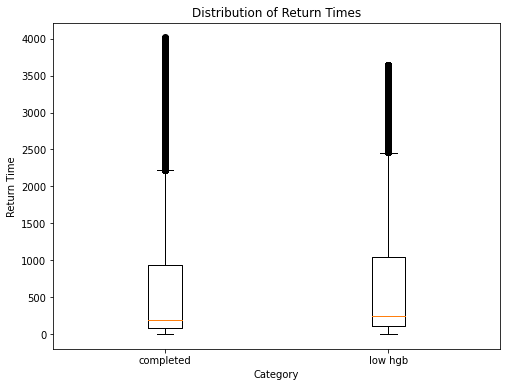

0


In [93]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['OUTCOME_TYPE'] == 'completed']['time_to_return'],
             df[df['OUTCOME_TYPE'] == 'low hgb']['time_to_return']],
            labels=['completed', 'low hgb'])

plt.xlabel('Category')
plt.ylabel('Return Time')
plt.title('Distribution of Return Times')
plt.show()

df_end=df.loc[df['time_to_return'] <0]
print(len(df_end))



In [106]:
#compute time_to_return with shifts for completed donation: subtract 56 days 
df['time_to_return_wo'] = df['time_to_return']
df['time_to_return'] = np.where(df['OUTCOME_TYPE'] == 'completed', (df['time_to_return_wo'] - 56), df['time_to_return'])


df['DEFERRAL_STOP_DATE'] = pd.to_datetime(df['DEFERRAL_STOP_DATE'], errors='coerce')
df['DEFERRAL_START_DATE'] = pd.to_datetime(df['DEFERRAL_START_DATE'],  errors='coerce')

df['DEF_PERIOD']=(df['DEFERRAL_STOP_DATE'] - df['DEFERRAL_START_DATE'])/np.timedelta64(1, 'D')

df.drop(df[df['DEF_PERIOD']>=2000].index, inplace=True)
df.fillna(0, inplace=True)
#compute time to return with shifts for deferrals
df['time_to_return'] = np.where(df['OUTCOME_TYPE'] != 'completed', (df['time_to_return_wo'] - df['DEF_PERIOD']), df['time_to_return'])

#check for na times
df['time_to_return'].isna().sum()
df.head()

,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,DONOR_EDUCATION_DESC,DONOR_WEIGHT,DONOR_HEIGHT,DONOR_ZIPCODE,DONOR_AGE_AT_DONATION,COLLECTION_FIXED_LOCATION,COLLECTION_SITE_VALID_FLAG,BECS_ID,DRIVE_SETUP_TYPE,DRIVE_TYPE_FIXED_MOBILE,DEFERRAL_EVENT,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP,MQ_ANSWER_x,MQ_ANSWER_y,MQ_ANSWER_x.1,MQ_ANSWER_y.1,SITE_STATE,ACCOUNT_TYPE_NAME,SITE_ZIPCode,Visit_Date,DonorID,cum_lifetime_donations,unit_rbc_loss,time_to_fu,rbc_loss_last_12_months,rbc_loss_last_24_months,days_since_last_rbc_loss,days_since_last_drbc_loss,def_isna,OUTCOME_TYPE,HGB_value,first_time,CENSORED,time_to_return,Fixed_mobile,FIXED_NEXT,fixed_mobile_pattern,time_to_return_wo,DEF_PERIOD,Year
15173301,20200319.0,80.0,3594276,W04112000159600I,Reengaged,30.0,69.0,530.0,304.0,15:26:01,15:34:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,F,A -,OTHER HISPANIC - SOME OTHER RACE,Hispanic,0,UNKNOWN,SOME COLLEGE OR TECHNICAL SCHOOL,190.0,63.0,799,35.0,No,Y,VTL,Mobile,Mobile,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,15.5,0,15.5,0,0,0,0.0,2020-03-19,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,completed,15.5,0,0,961.0,0,10.0,last,1017.0,0.0,2020
4895644,20220429.0,148.0,4506460,W142822312190001,Reengaged,113.0,567.0,530.0,29.0,09:00:01,09:11:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple RBC Filter Set,M,O +,REFUSED - REFUSED,Missing/Unknown/Refused,0,UNKNOWN,0,200.0,72.0,934,67.0,Yes,Y,VTL,Fixed,Fixed,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,17.7,0,17.7,0,0,0,0.0,2022-04-29,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,completed,17.7,0,1,31.0,1,1.0,FF,87.0,0.0,2022
8745575,20220725.0,148.0,4506460,W14282232229000Z,Active,113.0,567.0,530.0,29.0,11:37:01,11:45:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple RBC Filter Set,M,O +,REFUSED - REFUSED,Missing/Unknown/Refused,0,UNKNOWN,0,200.0,72.0,934,67.0,Yes,Y,VTL,Fixed,Fixed,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,18.4,0,18.4,0,0,0,0.0,2022-07-25,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,completed,18.4,0,1,-10.0,1,1.0,FF,46.0,0.0,2022
13476456,20220909.0,148.0,4506460,W14282233900300B,Active,113.0,567.0,530.0,29.0,09:26:01,09:33:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple RBC Filter Set,M,O +,REFUSED - REFUSED,Missing/Unknown/Refused,0,UNKNOWN,0,200.0,72.0,934,67.0,Yes,Y,VTL,Fixed,Fixed,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,17.9,0,17.9,0,0,0,0.0,2022-09-09,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,completed,17.9,0,1,-28.0,1,1.0,FF,28.0,0.0,2022
2594047,20221007.0,148.0,4506460,W14282233938900H,Active,113.0,567.0,530.0,29.0,09:21:01,09:30:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple RBC Filter Set,M,O +,REFUSED - REFUSED,Missing/Unknown/Refused,0,UNKNOWN,0,200.0,72.0,934,67.0,Yes,Y,VTL,Fixed,Fixed,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,17.6,0,17.6,0,0,0,0.0,2022-10-07,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,completed,17.6,0,0,29.0,1,10.0,last,85.0,0.0,2022


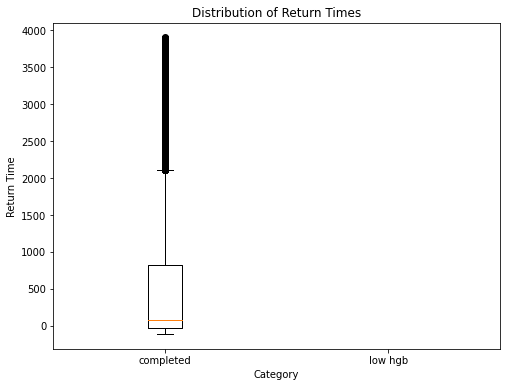

0


In [96]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['OUTCOME_TYPE'] == 'completed']['time_to_return'],
             df[df['OUTCOME_TYPE'] == 'low hgb']['time_to_return']],
            labels=['completed', 'low hgb'])

plt.xlabel('Category')
plt.ylabel('Return Time')
plt.title('Distribution of Return Times')
plt.show()

df_end=df.loc[df['time_to_return'] > 10000]
pd.set_option('display.max_columns', 100)
print(len(df_end))


In [97]:
#df.loc[df.DONOR_KEY==594921.0].head()
#add column indicating year of donation
df['Year'] = df['Visit_Date'].dt.year  

#df=df.drop(columns=['PHLEB_START_TIME_KEY','PHLEB_STOP_TIME_KEY', 'DONATION_BAG_DESCRIPTION','DONOR_ETHNICITY_DESC', 'DONOR_COUNTRY_OF_BIRTH', 
                    #'DONOR_EDUCATION_DESC', 'COLLECTION_FIXED_LOCATION','COLLECTION_SITE_VALID_FLAG', 'BECS_ID', 'DRIVE_SETUP_TYPE','DEFERRAL_EVENT',
                    #'DEFERRAL_INFORMATION','DEFERRAL_CREATE_DATE', 'DEFERRAL_START_DATE', 'DEFERRAL_STOP_DATE','DEF_INVALDATION_DATE','DEFERRAL_DESCRIPTION',
                    #'DEFERRAL_VALID_CODE', 'DURATION_MODIF_TYPE','ALLOW_DISTRIBUTION'])

first=df.loc[df.first_time==1]
len(first)


2110423

In [98]:
"""
#df_end[['time_to_return', 'time_to_return_wo', 'Visit_Date','DEFERRAL_STOP_DATE', 'OUTCOME_TYPE', 'DEFERRAL_DURATION']].loc[df_end.DEFERRAL_DURATION>1000].head(50)
df=df.drop(columns=['PHLEB_START_TIME_KEY','PHLEB_STOP_TIME_KEY', 'PHLEBOTOMY_CODE', 'PHLEBOTOMY_DESC', 'DONATION_BAG_DESCRIPTION',  'DONOR_ETHNICITY_DESC',  'COLLECTION_SITE_VALID_FLAG', 'BECS_ID', 
                    'DEFERRAL_INFORMATION','DEFERRAL_CREATE_DATE', 'DEFERRAL_START_DATE', 'DEFERRAL_STOP_DATE','DEF_INVALDATION_DATE', 'DURATION_MODIF_TYPE', 'ALLOW_DISTRIBUTION', 'FIXED_NEXT', "QUESTIONNAIRE_CLASS","QUESTION_CODE", 'QUESTION_TEXT'])
 """


'\n#df_end[[\'time_to_return\', \'time_to_return_wo\', \'Visit_Date\',\'DEFERRAL_STOP_DATE\', \'OUTCOME_TYPE\', \'DEFERRAL_DURATION\']].loc[df_end.DEFERRAL_DURATION>1000].head(50)\ndf=df.drop(columns=[\'PHLEB_START_TIME_KEY\',\'PHLEB_STOP_TIME_KEY\', \'PHLEBOTOMY_CODE\', \'PHLEBOTOMY_DESC\', \'DONATION_BAG_DESCRIPTION\',  \'DONOR_ETHNICITY_DESC\',  \'COLLECTION_SITE_VALID_FLAG\', \'BECS_ID\', \n                    \'DEFERRAL_INFORMATION\',\'DEFERRAL_CREATE_DATE\', \'DEFERRAL_START_DATE\', \'DEFERRAL_STOP_DATE\',\'DEF_INVALDATION_DATE\', \'DURATION_MODIF_TYPE\', \'ALLOW_DISTRIBUTION\', \'FIXED_NEXT\', "QUESTIONNAIRE_CLASS","QUESTION_CODE", \'QUESTION_TEXT\'])\n '

In [99]:

                    
mask = (df['Year'] >= 2017) 
df = df.loc[mask]
print(len(df.loc[df['CENSORED']==0]))
len(df.loc[df['CENSORED']==1])

"""
plt.figure()

h=sns.histplot(data=df, x="Year", hue="Fixed_mobile", binwidth=1, multiple="stack")
plt.legend(title='Fixed vs Mobile by Year', loc='upper left', labels=['Mobile', 'Fixed'])
plt.show(h)

df['Visit_Date'] = pd.to_datetime(df.Visit_Date, format='%Y-%m-%d')
df['Year-month']= df['Visit_Date'].dt.strftime('%Y-%m')
plt.figure(figsize=(8,4))
g=sns.histplot(data=df, x="Year-month", hue="Fixed_mobile", binwidth=1, multiple="stack")
plt.legend(title='Fixed vs Mobile by Year', loc='upper left', labels=['Mobile', 'Fixed'])


x_dates = df['Year-month'].sort_values().unique()
g.set_xticklabels(labels=x_dates, rotation=90, ha="right", fontsize=5)

plt.show(g)
"""
don['Fixed_mobile'] = np.where(don["DRIVE_TYPE_FIXED_MOBILE"] == 'Fixed', 'Fixed', 'Mobile') #mobile is 0, fixed is 1
sns.countplot(data=don, x="Year", hue="Fixed_mobile")

2069839


'\nplt.figure()\n\nh=sns.histplot(data=df, x="Year", hue="Fixed_mobile", binwidth=1, multiple="stack")\nplt.legend(title=\'Fixed vs Mobile by Year\', loc=\'upper left\', labels=[\'Mobile\', \'Fixed\'])\nplt.show(h)\n\ndf[\'Visit_Date\'] = pd.to_datetime(df.Visit_Date, format=\'%Y-%m-%d\')\ndf[\'Year-month\']= df[\'Visit_Date\'].dt.strftime(\'%Y-%m\')\nplt.figure(figsize=(8,4))\ng=sns.histplot(data=df, x="Year-month", hue="Fixed_mobile", binwidth=1, multiple="stack")\nplt.legend(title=\'Fixed vs Mobile by Year\', loc=\'upper left\', labels=[\'Mobile\', \'Fixed\'])\n\n\nx_dates = df[\'Year-month\'].sort_values().unique()\ng.set_xticklabels(labels=x_dates, rotation=90, ha="right", fontsize=5)\n\nplt.show(g)\n'

In [100]:
#write preprocessed data to csv
df.to_csv(("../1_data/private/preprocessed_data_Vitalant.csv"), index=False)